In [31]:
# test for reading JMA radar data in netcdf format
import netCDF4
import matplotlib.pyplot as plt

In [3]:
nc = netCDF4.Dataset('../data/2015/01/01/2p-jmaradar5_2015-01-01_0000utc.nc', 'r')

KeyError: 'dimname'

In [17]:
# dimensions
nx = len(nc.dimensions['LON'])
ny = len(nc.dimensions['LAT'])
nt = len(nc.dimensions['TIME'])
print("dims:",nx,ny,nt)

dims: 2560 3360 1


In [48]:
lons = nc.variables['LON'][:]
lats = nc.variables['LAT'][:]

In [46]:
lons

masked_array(data=[118.00625, 118.01875, 118.03125, ..., 149.96875,
                   149.98125000000002, 149.99375],
             mask=[False, False, False, ..., False, False, False],
       fill_value=9.969209968386869e+36)

In [24]:
# rain variable
nc.variables['PRATE']

<class 'netCDF4._netCDF4.Variable'>
int16 PRATE(TIME, LAT, LON)
    long_name: Precipitation rate (5 min.)
    units: 1e-3 meter/hour
    missing_value: -32768
    scale_factor: 0.01
    add_offset: 0.0
unlimited dimensions: 
current shape = (1, 3360, 2560)
filling on, default _FillValue of -32767 used

In [25]:
R = nc.variables['PRATE'][:]

In [29]:
R.data.shape

(1, 3360, 2560)

In [30]:
R.data[0,:,:]

array([[-32768., -32768., -32768., ..., -32768., -32768., -32768.],
       [-32768., -32768., -32768., ..., -32768., -32768., -32768.],
       [-32768., -32768., -32768., ..., -32768., -32768., -32768.],
       ...,
       [-32768., -32768., -32768., ..., -32768., -32768., -32768.],
       [-32768., -32768., -32768., ..., -32768., -32768., -32768.],
       [-32768., -32768., -32768., ..., -32768., -32768., -32768.]],
      dtype=float32)

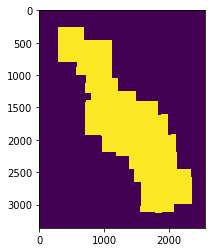

In [32]:
# showning a shape of Japan upside-down
plt.imshow(R.data[0,:,:])

In [50]:
from mpl_toolkits.basemap import Basemap
import numpy as np

In [36]:
# Get some parameters for the Stereographic Projection
lat_0 = 35.5
lon_0 = 139.0
m = Basemap(width=500000,height=350000,
            resolution='l',projection='stere',\
            lat_ts=35,lat_0=lat_0,lon_0=lon_0)

In [51]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

/home/tsuyoshi/anaconda3/envs/fastai/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/tsuyoshi/anaconda3/envs/fastai/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


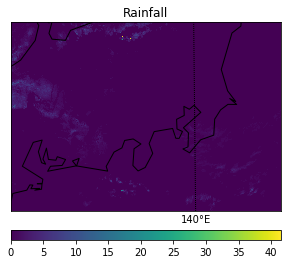

In [52]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(R))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
#cbar.set_label(tmax_units)

# Add Title
plt.title('Rainfall')

plt.show()

In [56]:
lons.data[1]-lons.data[0]

0.012500000000002842

In [57]:
lats.data[1]-lats.data[0]

0.00833333313486051

In [72]:
# clip area around tokyo
lat_tokyo = 35.681167
lon_tokyo = 139.767052
nx_clip = 200
ny_clip = 200
i0=np.argmin(np.abs(lons.data-lon_tokyo)) - int(nx_clip/2)
j0=np.argmin(np.abs(lats.data-lat_tokyo)) - int(ny_clip/2)
i1=i0+nx_clip
j1=j0+ny_clip

In [73]:
i1-i0

200

In [75]:
lons.data[i0:i1]

array([138.51875, 138.53125, 138.54375, 138.55625, 138.56875, 138.58125,
       138.59375, 138.60625, 138.61875, 138.63125, 138.64375, 138.65625,
       138.66875, 138.68125, 138.69375, 138.70625, 138.71875, 138.73125,
       138.74375, 138.75625, 138.76875, 138.78125, 138.79375, 138.80625,
       138.81875, 138.83125, 138.84375, 138.85625, 138.86875, 138.88125,
       138.89375, 138.90625, 138.91875, 138.93125, 138.94375, 138.95625,
       138.96875, 138.98125, 138.99375, 139.00625, 139.01875, 139.03125,
       139.04375, 139.05625, 139.06875, 139.08125, 139.09375, 139.10625,
       139.11875, 139.13125, 139.14375, 139.15625, 139.16875, 139.18125,
       139.19375, 139.20625, 139.21875, 139.23125, 139.24375, 139.25625,
       139.26875, 139.28125, 139.29375, 139.30625, 139.31875, 139.33125,
       139.34375, 139.35625, 139.36875, 139.38125, 139.39375, 139.40625,
       139.41875, 139.43125, 139.44375, 139.45625, 139.46875, 139.48125,
       139.49375, 139.50625, 139.51875, 139.53125, 

In [89]:
Rclip = R.data[0,j0:j1,i0:i1]
lon_clip=lons.data[i0:i1]
lat_clip=lats.data[j0:j1]

In [80]:
Rclip.max()

2.6299999

In [81]:
Rclip.min()

0.0

In [83]:
Rclip.mean()

0.04122675

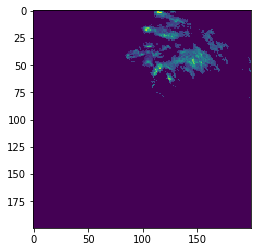

In [84]:
plt.imshow(Rclip)

In [90]:
lat_clip

array([34.84583331, 34.85416665, 34.86249998, 34.87083331, 34.87916665,
       34.88749998, 34.89583331, 34.90416665, 34.91249998, 34.92083331,
       34.92916664, 34.93749998, 34.94583331, 34.95416664, 34.96249998,
       34.97083331, 34.97916664, 34.98749998, 34.99583331, 35.00416664,
       35.01249998, 35.02083331, 35.02916664, 35.03749998, 35.04583331,
       35.05416664, 35.06249997, 35.07083331, 35.07916664, 35.08749997,
       35.09583331, 35.10416664, 35.11249997, 35.12083331, 35.12916664,
       35.13749997, 35.14583331, 35.15416664, 35.16249997, 35.17083331,
       35.17916664, 35.18749997, 35.1958333 , 35.20416664, 35.21249997,
       35.2208333 , 35.22916664, 35.23749997, 35.2458333 , 35.25416664,
       35.26249997, 35.2708333 , 35.27916664, 35.28749997, 35.2958333 ,
       35.30416664, 35.31249997, 35.3208333 , 35.32916664, 35.33749997,
       35.3458333 , 35.35416663, 35.36249997, 35.3708333 , 35.37916663,
       35.38749997, 35.3958333 , 35.40416663, 35.41249997, 35.42

In [91]:
import glob

In [93]:
import gzip

In [101]:
id = [i*5 for i in range(12)]

In [102]:
id

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

In [103]:
"file"+id

TypeError: must be str, not list

In [ ]:
for 